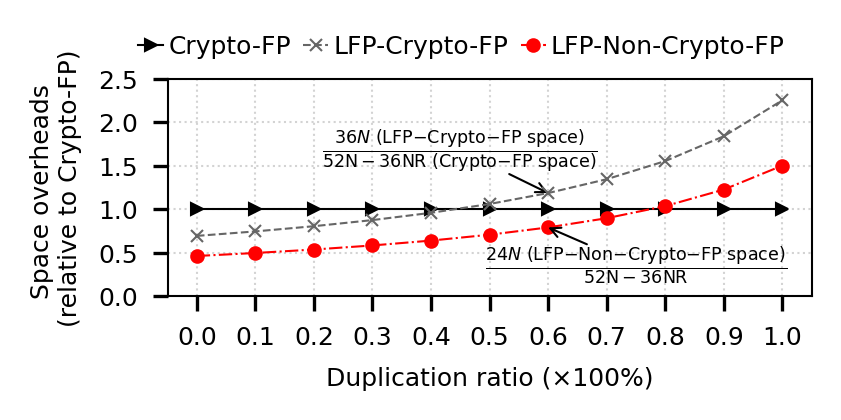

In [18]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
# matplotlib style settings
plt.rcParams.update(plt.rcParamsDefault)
matplotlib.rcParams['text.usetex'] = False
%matplotlib inline
style.use('grayscale')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linestyle"] = ":"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["grid.color"] = "lightgray"
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
# with open("./performance-comparison-table-4K-all-dram", "r") as f:
#     df_4K = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
# with open("./performance-comparison-table-continuous-all-dram", "r") as f:
#     df_cont = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH -2), cm_to_inch(3)))
fig.patch.set_facecolor('white')
# df = df_4K
# df.drop(df[df['file_system'] == "PMM"].index, inplace=True)
# Plotting Settings
line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"]
# subtitles = ["(a) SW", "(b) RW", "(c) SR", "(d) RR", "(e) Strict-SW", "(f) Strict-RW"]
fss = ["Crypto-FP", "FDM-Crypto-FP", "FDM-Non-Crypto-FP"]
size_map = [
    lambda x: 1,
    lambda x: 36 / (52 - 36 * x),
    lambda x: 24 / (52 - 36 * x),
]

dup_rates = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

context = ""
axes = []
lines = []
cmap = "tab10"

ylims = [
    [0.8, 3],
    [0, 9],
]

for fs_idx, fs in enumerate(fss):
    _map = size_map[fs_idx]
    if fs_idx == 2:
        line = plt.plot(dup_rates, [ _map(dup_rate) for dup_rate in dup_rates],  linewidth=line_width,label=fs, marker=marks[fs_idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[fs_idx], zorder=10, color="red")   
    else:
        line = plt.plot(dup_rates, [ _map(dup_rate) for dup_rate in dup_rates],  linewidth=line_width,label=fs, marker=marks[fs_idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[fs_idx], zorder=10)
    lines.append(line)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    plt.xticks(dup_rates, fontsize=6)
    plt.xlabel("Duplication ratio (×100%)", fontsize=6)
    plt.yticks([0, 0.5, 1, 1.5, 2, 2.5], fontsize=6)
    plt.ylabel("Space overheads \n(relative to Crypto-FP)", fontsize=6)
    
    # label the fs's map equation
    if fs_idx == 1:
        # ax.text(0.7, 1.5, "$\\frac{36N}{52N - 36NR}$", fontsize=6)
        ax.annotate("$\\frac{36N\ \\rm (LFP{-}Crypto{-}FP\ space)}{52N - 36NR\ \\rm (Crypto{-}FP\ space)}$", xy=(0.6, _map(0.6)), xytext=(0.45, 1.6), fontsize=6, arrowprops=dict(arrowstyle='->', lw=0.5, shrinkA=0, shrinkB=0), ha='center',bbox=dict(boxstyle='square,pad=0', fc='none', ec='none'))
    elif fs_idx == 2:
        ax.annotate("$\\frac{24N\ \\rm (LFP{-}Non{-}Crypto{-}FP\ space)}{52N - 36NR}$", xy=(0.6, _map(0.6)), xytext=(0.75, 0.25), fontsize=6, arrowprops=dict(arrowstyle='->', lw=0.5, shrinkA=0, shrinkB=0), ha='center',bbox=dict(boxstyle='square,pad=0', fc='none', ec='none'), zorder=10)
    

handles, labels = ax.get_legend_handles_labels()

# steps = [3, 1, 1, 1, 1, 0, 0, 0, 0, 0]
# cols = [3, 2, 2, 2, 1, 0, 0, 0, 0, 0]
# for ax_id, ax in enumerate(fig.axes):
#     if steps[ax_id] == 0:
#         continue
#     start = sum(steps[:ax_id])
#     end = start + steps[ax_id]
    
#     leg = ax.legend(handles[start : end], fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=cols[ax_id], fontsize=5, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

fig.legend(labels=["Crypto-FP", "LFP-Crypto-FP", "LFP-Non-Crypto-FP"], loc='upper center', ncol=4, bbox_to_anchor=(0.55, 1.1), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=6)

# plt.tight_layout(pad=0.4)
# ax.legend(handles, fss, loc='upper center', bbox_to_anchor=(0,0,1,1), ncol=6, fontsize=5, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=6)
plt.tight_layout(pad=0.4)
# adjust_explanation(fig, axes, context, [1, 1, 1, 1, 0, 0])
# gs0.tight_layout(fig)
plt.savefig("./FIG-SpaceOverhead.pdf", bbox_inches='tight', pad_inches=0)
